





### PROBLEM STATEMENT- Email Spam Classifier


In this assignment, we'll build a SVM classifier to classify emails into spam and ham. The dataset, taken from the UCI ML repository, contains about 4600 emails labelled as **spam** or **ham**. 





In [65]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve, train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
%matplotlib inline

In [30]:
# loading the data
email_rec = pd.read_csv("C:\\Users\\AbhinavPeddi\\datasets\\Spam.csv" )

In [31]:
#print email_rec
print(email_rec.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [32]:
# Dimensions of the DataFrame
print(email_rec.shape)

(4601, 58)


In [33]:
# Check data type information
print(email_rec.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [34]:
#Check if any missing values in the dataset 
print(email_rec.isna().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Let's also look at the fraction of spam and ham emails in the dataset.

In [40]:
# look at fraction of spam emails 
print(email_rec['spam'].value_counts()/ len(email_rec['spam'])*100)

0    60.595523
1    39.404477
Name: spam, dtype: float64


You can see that we have 40% of spam mails and 60% of ham

In [42]:
#  print the summary stats of all columns
print(email_rec.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

In [46]:
# splitting data into X (having all features) and y (having target i.e spam)
X = email_rec.drop('spam', axis=1)

y = email_rec['spam']

#### Scaling the features

We will Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

x = x-mean(x)/std(x)





In [47]:
# Instantiate StandardScaler
scaler = StandardScaler()

#fit and transform X
X= scaler.fit_transform(X)


In [48]:
# split into train and test with test_size as 30% and random_state as 4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

## Model Building



### Model building

Firstly using the default kernal i.e RBF

In [51]:
# Instantiate an object of class SVC(), using cost C=1
model = SVC(C=1)
# fit model on training data
model.fit(X_train, y_train)
# predict on test data
y_pred_rbf = model.predict(X_test)

##### Evaluate the model using confusion matrix 


#### Print other metrics

In [62]:
#print accuracy_score
print(metrics.accuracy_score(y_test, y_pred_rbf)*100)

92.83128167994207


In [ ]:
#print classification report
print(metrics.classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       849
           1       0.93      0.89      0.90       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [63]:
#print confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred_rbf))

[[811  38]
 [ 61 471]]


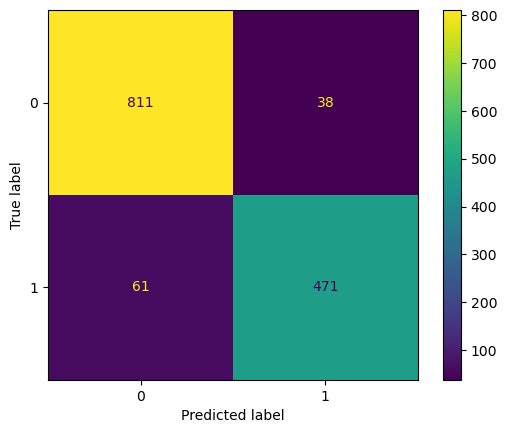

In [66]:
#Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

The SVM we have built so far gives decently good results - an accuracy of 92%, sensitivity/recall (TNR) of 88%. 

### Interpretation of Results

In the confusion matrix, the elements at (0, 0) and (1,1) correspond to the more frequently occurring class, i.e. ham emails. Thus, it implies that:
- 92% of all emails are classified correctly
- 88.5% of spams are identified correctly (sensitivity/recall)
- Specificity, or % of hams classified correctly, is 95%



### K-Fold Cross Validation



In [68]:
# creating a KFold object with 5 splits , shuffle True and random_state=4
folds = KFold(n_splits=5, shuffle=True, random_state=4)
# instantiating a SVC model with cost=1 and random_state=4
model = SVC(C=1.0, random_state=4)

Computing the cross-validation scores 1(note that the argument cv takes the 'folds' object, and we have specified 'accuracy' as the metric


In [70]:
# Computing the cross-validation scores
cv_results = cross_val_score(model, X_train, y_train, cv=folds, scoring='accuracy')

In [72]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
#print mean accuracy of all 5 folds
print(f'Mean Accuracy: {cv_results.mean()}')

[0.91770186 0.94099379 0.92080745 0.93012422 0.93944099]
Mean Accuracy: 0.9298136645962731


## Hyperparameter Tuning
### Grid Search to Find Optimal Hyperparameter C



## **`Watch Video 2 : Hyperparameter Tuning SVM using GridSearchCV`**

In [76]:
# specify range of parameters (C) as a list
params = {'C': [0.1, 1, 10, 100, 1000]}
#Intialise SVC()
model = SVC()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=folds, verbose=1, return_train_score=True )

In [77]:
# fit the model on train data, it will fit 5 folds across all values of C
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [78]:
#convert results of grid search CV into dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
#print cv_results
print(cv_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.141500      0.007403         0.079427        0.002276     0.1   
1       0.097891      0.004431         0.047094        0.003400       1   
2       0.091383      0.008072         0.037777        0.004180      10   
3       0.108567      0.009627         0.035002        0.003578     100   
4       0.151149      0.024156         0.032108        0.004895    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.1}           0.895963           0.902174           0.906832   
1     {'C': 1}           0.917702           0.940994           0.920807   
2    {'C': 10}           0.908385           0.944099           0.933230   
3   {'C': 100}           0.913043           0.927019           0.936335   
4  {'C': 1000}           0.908385           0.931677           0.922360   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.90217

C:\Users\AbhinavPeddi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AbhinavPeddi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


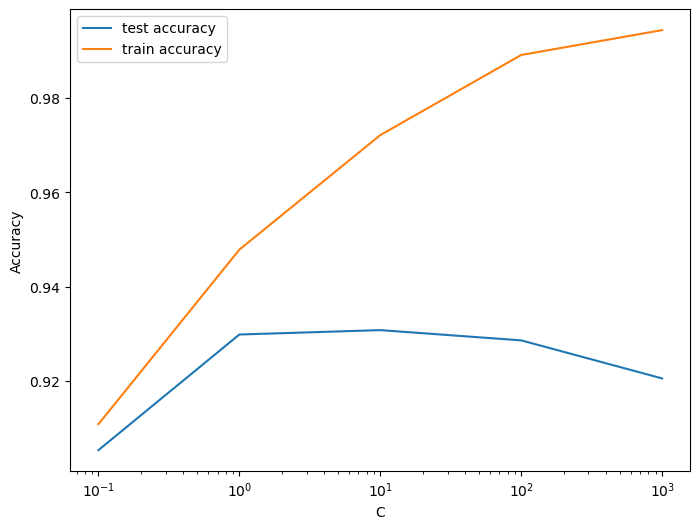

In [82]:
# plot of C versus train and test scores
plt.figure(figsize=(8, 6))
sns.lineplot(cv_results['param_C'],cv_results['mean_test_score'])
sns.lineplot(cv_results['param_C'],cv_results['mean_train_score'])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left' )
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to **overfit** the model. This is because a high C value aims to classify all training examples correctly (since C is the *cost of misclassification* - if you impose a high cost on the model, it will avoid misclassifying any points by overfitting the data). 



Let's finally look at the optimal C values found by GridSearchCV.

In [84]:
#get best score for above gridearch
best_score = model_cv.best_score_
#get best c value as well
best_params = model_cv.best_params_
best_C= best_params['C']
print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

 The highest test accuracy is 0.9307453416149067 at C = 10


Let's now look at the metrics corresponding to C=10.

In [85]:
# model with the best value of C
model = SVC(C=10)
# fit model on training data
model.fit(X_train, y_train)
# predict on test data
y_pred_rbf1 = model.predict(X_test)

In [87]:
#print confusion_matrix
print(confusion_matrix(y_test, y_pred_rbf1))

[[810  39]
 [ 57 475]]


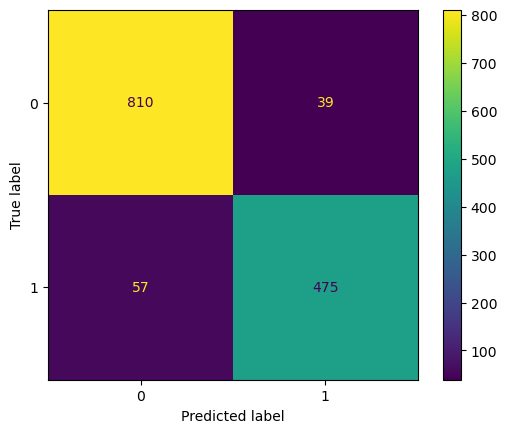

In [93]:
#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf1, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

Observe type 2 error is reduced after hyperparameter tuning

In [92]:
#Accuracy Score
print(f'Accuracy Score: {metrics.accuracy_score(y_test, y_pred_rbf1)}')
#Classification report
print(metrics.classification_report(y_test, y_pred_rbf1))

Accuracy Score: 0.9304851556842868
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       849
           1       0.92      0.89      0.91       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.93      1381
weighted avg       0.93      0.93      0.93      1381



## Optimising for Other Evaluation Metrics
In this case, we had optimised (tuned) the model based on overall accuracy, though that may not always be the best metric to optimise. For example, if we are concerned more about catching all spams (positives), we may want to maximise TPR or sensitivity/recall. If, on the other hand, we want to avoid classifying hams as spams (so that any important mails don't get into the spam box), we would maximise the TNR or specificity.

In [95]:
# specify params with C as list [0.1, 1, 10, 100, 1000]
params = {'C': [0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable i.e.['accuracy', 'precision', 'recall']
scores = ['accuracy', 'precision', 'recall']

# iterate through scores
for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    # set up GridSearch for score metric with estimator, params, cv, scoring as scores and return_train_score=True
    clf = GridSearchCV(SVC(), params, cv=folds, scoring=score, return_train_score=True )
    # fit model on training data
    clf.fit(X_train, y_train)
    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")

# Tuning hyper-parameters for accuracy
 The highest accuracy score is 0.9307453416149067 at C = {'C': 10}


# Tuning hyper-parameters for precision
 The highest precision score is 0.9373311086391073 at C = {'C': 0.1}


# Tuning hyper-parameters for recall
 The highest recall score is 0.8987270122310326 at C = {'C': 10}




Thus, we can see that the optimal value of the hyperparameter varies significantly with the choice of evaluation metric.


We have 3 most important hyperparameters to optimise in SVM - 
- The choice of kernel (linear, rbf etc.)
- C
- gamma
Lets do optimize these parameter values and check our model

In [96]:
# Get list of all available kernels in SVM in a list i.e. ['Polynomial', 'RBF', 'Sigmoid','Linear']
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
#A function which returns the corresponding SVC model for different kernals
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [101]:
# Iterate in the range of 4
for i in range(4):
    # Use getClassifier() function for different ith value to get SVC model using different kernal
    svcclassifier = getClassifier(i)
    # fit above model
    svcclassifier.fit(X_train, y_train) 
    # Make prediction on test data
    y_pred=svcclassifier.predict(X_test)
    # Check which kernal is used as per kernels list
    print('Evaluation:' ,kernels[i], 'kernel' )
    # Evaluate our model using classification_report
    print(metrics.classification_report(y_test, y_pred))



Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       849
           1       0.91      0.20      0.33       532

    accuracy                           0.69      1381
   macro avg       0.79      0.60      0.56      1381
weighted avg       0.76      0.69      0.62      1381

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       849
           1       0.93      0.89      0.90       532

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       849
           1       0.86      0.87      0.86       532

    accuracy                           0.90      1381
   macro avg       0.89      0.89      0.89     

From above we can see thta rbf krnals gives better prediction result

lets do gridsearch and confirm value of C, gamma and kernel.


C= [0.1,1, 10, 100]
gamma= [1,0.1,0.01,0.001]
kernel= ['rbf', 'poly', 'sigmoid']`

In [103]:
# Create a dictionary param_grid for C, gamma and kernel values given below
param_grid = {'C': [0.1,1, 10, 100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf', 'poly', 'sigmoid']}
#Initialise GridSearchCV with SVC(), param_grid, refit=True and verbose=2 and  return_train_score=True
grid = GridSearchCV(SVC(), param_grid=param_grid,refit=True, verbose=2 ,return_train_score=True )
#fit Gridsearch on X_train and y_train
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             return_train_score=True, verbose=2)

In [106]:
# cv results into a dataframe
cv_results = pd.DataFrame(grid.cv_results_)
# print cv_result
print(cv_results)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.281135      0.027927         0.158945        0.011180     0.1   
1        0.147092      0.031084         0.010010        0.001937     0.1   
2        0.119190      0.022435         0.022817        0.002318     0.1   
3        0.204002      0.011012         0.126781        0.005831     0.1   
4        0.122982      0.010302         0.016425        0.001998     0.1   
5        0.117661      0.009744         0.023965        0.002336     0.1   
6        0.189458      0.018156         0.111372        0.007538     0.1   
7        0.201950      0.016953         0.037984        0.003107     0.1   
8        0.173154      0.004677         0.037251        0.002629     0.1   
9        0.212251      0.019973         0.134425        0.004428     0.1   
10       0.187588      0.019310         0.032458        0.001224     0.1   
11       0.260976      0.028349         0.060556        0.010466     0.1   
12       0.3

- **High values of gamma** lead to **overfitting** (especially at high values of C); note that the training accuracy at gamma=0.01 and C=1000 reaches almost 99% 
- The **training score increases with higher gamma**, though the **test scores are comparable** (at sufficiently high cost, i.e. C > 10)
- The least amount of overfitting (i.e. difference between train and test accuracy) occurs at low gamma, i.e. a quite *simple non-linear model*


In [107]:
# get the optimal accuracy score and hyperparameters
best_score = grid.best_score_
# get the optimal hyperparameters
best_hyperparams = grid.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9335403726708075 corresponding to hyperparameters {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


Though sklearn suggests the optimal scores mentioned above (gamma=0.001, C=100, kernel=rbf), one could argue that it is better to choose a simpler, more non-linear model with gamma=0.0001. This is because the optimal values mentioned here are calculated based on the average test accuracy (but not considering subjective parameters such as model complexity).

We can achieve comparable average test accuracy (~92.5%) with gamma=0.0001 as well, though we'll have to increase the cost C for that. So to achieve high accuracy, there's a tradeoff between:
- High gamma (i.e. high non-linearity) and average value of C
- Low gamma (i.e. less non-linearity) and high value of C

We argue that the model will be simpler if it has as less non-linearity as possible, so we choose gamma=0.0001 and a high C=100.

### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [117]:
# model with optimal hyperparameters as obtained above
model =SVC(C=10, gamma=0.01)
#fit model on training data
model.fit(X_train, y_train)
# predict on test data
y_pred = model.predict(X_test)
# print accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.9348298334540188


[[812  37]
 [ 53 479]]


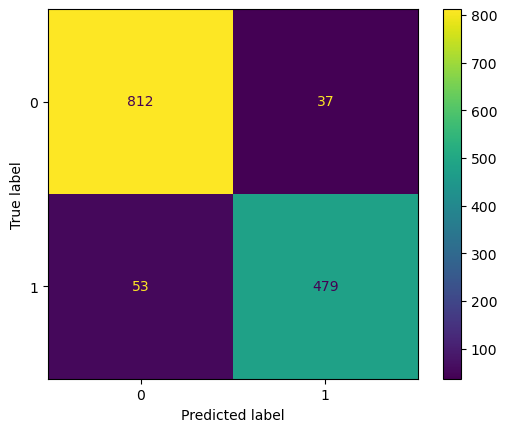

In [119]:
# print confusion metrics
print(confusion_matrix(y_test, y_pred))
#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [120]:
#Classfication report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       849
           1       0.93      0.90      0.91       532

    accuracy                           0.93      1381
   macro avg       0.93      0.93      0.93      1381
weighted avg       0.93      0.93      0.93      1381



we've improved our model by reduced type1 and type 2 errors after hyperparameter tuning.